<a href="https://colab.research.google.com/github/psGitOrange/Delhivery-Feature-Engineering/blob/main/Delhivery_feat_forecast4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delhivery - Feature Engineering and Forecasting Model

### **About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

<img src="https://i.imgur.com/Iq9D3CN.png" alt="delhivery_img" width="720"/>

## Business Problem Statement:
The company wants to understand and process the data coming out of data engineering pipelines:

- Clean, sanitize and manipulate data to get useful features out of raw fields.
- Make sense out of the raw data and help the data science team to build forecasting models on it.

**Concepts Used:**

- Feature Creation
- Relationship between Features
- Column Normalization /Column Standardization
- Handling categorical values
- Missing values - Outlier treatment / Types of outliers

### Dataset:</br>
Dataset Link: [Delhivery_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv)

**Column Profiling:**

- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
  - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
  - Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

## Raw Data Processing

Preprocessing the raw data provided by Delhivery to be further used for Analysis and Business insights.

In [1]:
# Data Handling Library
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# System
import os

In [4]:
raw_df = pd.read_csv('delhivery_data.csv')
raw_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [5]:
raw_df.shape

(144867, 24)

In [6]:
raw_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [7]:
# raw_df.dtypes

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
# few missing source and destination name, these are imp hence we will drop the
# ones with them
raw_df = raw_df.dropna(how='any').reset_index()

In [10]:
raw_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
index,144316.0,72418.07,41792.47,0.00,36238.75,72418.50,108595.25,144866.00
start_scan_to_end_scan,144316.0,963.70,1038.08,20.00,161.00,451.00,1645.00,7898.00
cutoff_factor,144316.0,233.56,345.25,9.00,22.00,66.00,286.00,1927.00
actual_distance_to_destination,144316.0,234.71,345.48,9.00,23.35,66.14,286.92,1927.45
actual_time,144316.0,418.00,598.94,9.00,51.00,132.00,516.00,4532.00
osrm_time,144316.0,214.44,308.45,6.00,27.00,64.00,259.00,1686.00
osrm_distance,144316.0,285.55,421.72,9.01,29.90,78.62,346.31,2326.20
factor,144316.0,2.12,1.72,0.14,1.60,1.86,2.21,77.39
segment_actual_time,144316.0,36.18,53.52,-244.00,20.00,28.00,40.00,3051.00
segment_osrm_time,144316.0,18.50,14.77,0.00,11.00,17.00,22.00,1611.00


start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance are all highly right skewed

In [11]:
# we will be ignoring column used to mark training and testing data
raw_df = raw_df.drop(columns=['data','is_cutoff', 'cutoff_factor','cutoff_timestamp',
                     'factor', 'segment_factor']).reset_index()

In [12]:
raw_df.head(3)

,level_0,index,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0,0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,1,1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2,2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152


**Dataset Overview**

We have loaded the dataset into our DataFrame, which consists of **144k** rows and **24** columns. Key columns include:
- `data`: Contains training and testing IDs
- `trip_creation_time`: Timestamp of trip creation
- `trip_uuid`: Unique identifier for each trip
- `source_name` and `destination_name`: Source and destination locations
- `actual_time` and `actual_distance`: Time and distance recorded during the trip
- `osrm_time` and `osrm_distance`: System-predicted time and distance

**Handling Null Values**

From the `info()` function, we observe missing values in the `source_name` and `destination_name` columns, which will be dropped as these cannot be reliably inferred for route analysis.

**Data Distribution**

The `describe()` function reveals that most numerical variables are highly right-skewed, including: `start_scan_to_end_scan`, `actual_distance_to_destination`, `actual_time`, `osrm_time`, `osrm_distance`

**Dropped Columns**

We removed a few columns relating to **factor** that are not essential for analysis, or for which we have limited knowledge:
`data`, `is_cut_off`, `cut_off_factor`, `cut_off_time_stamp`, `factor`, `segment_factor`.

### Data Consolidation

**Route Types: FTL and Carting***

Both **FTL** (Full Truck Load) and **Carting** route types have intermediate stops/segments between the source and destination. Carting routes typically involve **more** intermediate destinations for pick-up and drop-off of goods.

**Trip-Level Data Analysis**

Our analysis focuses on unique **trip IDs**, which represent the number of trips the company is tasked with completing—key to the company's objective of increasing trip completion rates.

First, we consolidate data based on the **trip ID, source, and destination name**.

The segment data has seperate values for each entry between the source and destination. We use the **cumulative sum** function to calculate the total for each source-destination pair.


In [13]:
segment_cols = ['segment_actual_time', 'segment_osrm_time',
                'segment_osrm_distance']
# to get sum of segment values for each source - destination pair
for col in segment_cols:
    raw_df[col + '_sum'] = raw_df.groupby(['trip_uuid', 'source_center',
                                   'destination_center'])[col].cumsum()

In [14]:
raw_df[[col + '_sum' for col in segment_cols]].head()

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772


> The **segment aggregation dictionary** contains columns and respective aggregation methods used during the `groupby` and `aggregate` operations.

> For each trip ID, source, and destination pair, we use the **last value** of the actual, OSRM, and segment columns to represent the total for each trip.

In [15]:
segment_agg_dict = {
    # 'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    # 'trip_uuid' : 'first',

    # 'source_center' : 'first',
    'source_name' : 'first',
    # 'destination_center' : 'first',
    'destination_name' : 'first',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last'
}

In [16]:
segment_df = raw_df.groupby(['trip_uuid', 'source_center',
                                   'destination_center']) \
                   .agg(segment_agg_dict).reset_index()
# order changes after aggregation
segment_df = segment_df.sort_values(by=['trip_uuid', 'od_end_time'])

In [17]:
segment_df

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
5,trip-153671043369099517,IND562132AAA,IND000000ACB,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26216,trip-153861115439069069,IND627657AAA,IND628613AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,30.0,25.7087
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26221,trip-153861118270144424,IND583201AAA,IND583119AAA,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,26.0,28.0484,41.0,25.0,28.0484


In [18]:
# we can see the data consolidated w.r.t trip uuid, source and destination name
segment_df[segment_df['trip_uuid'] == 'trip-153741093647649320']

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
10370,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10371,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


> To consolidate data by trip, we perform a `groupby` operation on `trip_uuid` and **sum** the distance and time-related variables. This provides the **total distance covered** and **time taken** for each trip.

In [19]:
trip_agg_dict = {
    # 'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    # 'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'first',
    'destination_name' : 'first',

    'od_start_time' : 'first',  # capturing first time on order generation
    'od_end_time' : 'last',  # capturing last time of order end
    'start_scan_to_end_scan' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum'
}

In [20]:
# group by "sum"
trip_df = segment_df.groupby(['trip_uuid']).agg(trip_agg_dict).reset_index()

In [21]:
trip_df.head(15)

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
5,trip-153671055416136166,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
6,trip-153671066201138152,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184
7,trip-153671066826362165,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560064AAA,Bengaluru_NwYlhnka_DC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203
8,trip-153671074033284934,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395023AAD,Surat_Central_I_4 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),2018-09-12 00:05:40.333071,2018-09-12 05:16:28.581141,280.0,25.454848,161.0,29.0,30.9359,161.0,29.0,30.9358
9,trip-153671079956500691,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),2018-09-12 00:06:39.565253,2018-09-12 00:55:59.568645,49.0,9.872146,23.0,8.0,9.9566,23.0,14.0,16.0860


In [22]:
# we can see the data consolidated w.r.t trip uuid
trip_df[trip_df['trip_uuid'] == 'trip-153741093647649320']

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
5917,trip-153741093647649320,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,195.0,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106


### Feature Engineering
**Extracting key** features from the aggregated dataset.

**Trip Time Comparison Features**

The `start_scan_to_end_scan` column represents the total time taken to complete each trip or delivery recorded by delivery person on site.

We also have two similar columns, `od_start_time` and `od_end_time`, which indicate the order's start and end times. The difference between these two, also indicates the total time  which is system-recorded.

Compare it with the `start_scan_to_end_scan` column, any difference between these values will highlight the difference between actual time taken and the system-recorded times for each trip.

In [23]:
trip_df['od_start_time'] = pd.to_datetime(trip_df['od_start_time'])
trip_df['od_end_time'] = pd.to_datetime(trip_df['od_end_time'])
trip_df['od_time_diff_hour'] = (trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds() / (60)

In [24]:
trip_df.drop(columns=['od_start_time', 'od_end_time'], inplace=True)

In [25]:
trip_df[['od_time_diff_hour', 'start_scan_to_end_scan']]

,od_time_diff_hour,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14782,405.485842,257.0
14783,60.590521,60.0
14784,422.119867,421.0
14785,348.512862,347.0


In [26]:
# lowercase to ensure data consistency
trip_df['destination_name'] = trip_df['destination_name'].str.lower()
trip_df['source_name'] = trip_df['source_name'].str.lower()

**Features for Route Analysis**

For route analysis, we extract **state**, **city**, **place**, and **code** from both the `source_name` and `destination_name` columns.

We defined functions to extract these features and used `apply` with a lambda function to retrieve them from both the source and destination names.


In [27]:
def place2state(x):
    # extract state mentioned between brackets
    state = x.split('(')[1]
    return state[:-1]  # removing ')' from end

def place2city(x):
    city = x.split('(')[0]
    city = city.split('_')[0]  # first split is city

    # edge cases
    if city == 'pnq vadgoan sheri dpc':
        return 'vadgoansheri'

    if city in ['pnq pashan dpc', 'pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'mumbai antop hill' : return 'mumbai'

    return city

def place2city_place(x):
    x = x.split('(')[0]
    len_ = len(x.split('_'))

    if len_ >= 3:
      return x.split('_')[1]  # second split is city place

    # small cities have same city and place name
    if len_ == 2:
      return x.split('_')[0]  # first split is city place

    return x.split(' ')[0]  # incase where only city name is given with no code

def place2code(x):
    x = x.split('(')[0]

    if len(x.split('_')) >=2:
      return x.split('_')[-1]  # last split is code

    return 'none'

In [28]:
trip_df['dest_state'] = trip_df['destination_name'].apply(lambda x: place2state(x))
trip_df['dest_city'] = trip_df['destination_name'].apply(lambda x: place2city(x))
trip_df['dest_place'] = trip_df['destination_name'].apply(lambda x: place2city_place(x))
trip_df['dest_code'] = trip_df['destination_name'].apply(lambda x: place2code(x))

In [29]:
trip_df[['trip_uuid', 'dest_state', 'dest_city', 'dest_place', 'dest_code']]

,trip_uuid,dest_state,dest_city,dest_place,dest_code
0,trip-153671041653548748,uttar pradesh,kanpur,central,6
1,trip-153671042288605164,karnataka,doddablpur,chikadpp,d
2,trip-153671043369099517,haryana,gurgaon,bilaspur,hb
3,trip-153671046011330457,maharashtra,mumbai,mirard,ip
4,trip-153671052974046625,karnataka,hospet,hospet,none
...,...,...,...,...,...
14782,trip-153861095625827784,punjab,zirakpur,zirakpur,dc
14783,trip-153861104386292051,haryana,faridabad,blbgarh,dc
14784,trip-153861106442901555,uttar pradesh,kanpur,govndngr,dc
14785,trip-153861115439069069,tamil nadu,eral,busstand,d


In [30]:
trip_df[trip_df['trip_uuid'] == 'trip-153671052974046625']

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,dest_state,dest_city,dest_place,dest_code
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,bellary_dc (karnataka),IND583201AAA,hospet (karnataka),717.0,127.4485,...,117.0,146.7918,340.0,115.0,146.7919,718.349042,karnataka,hospet,hospet,none


In [31]:
trip_df['source_state'] = trip_df['source_name'].apply(lambda x: place2state(x))
trip_df['source_city'] = trip_df['source_name'].apply(lambda x: place2city(x))
trip_df['source_place'] = trip_df['source_name'].apply(lambda x: place2city_place(x))
trip_df['source_code'] = trip_df['source_name'].apply(lambda x: place2code(x))

In [32]:
trip_df.drop(columns=['source_center', 'destination_center', 'source_name', 'destination_name'], inplace=True)

In [33]:
trip_df[['trip_uuid', 'source_state', 'source_city', 'source_place', 'source_code']]

,trip_uuid,source_state,source_city,source_place,source_code
0,trip-153671041653548748,madhya pradesh,bhopal,trnsport,h
1,trip-153671042288605164,karnataka,tumkur,veersagr,i
2,trip-153671043369099517,karnataka,bangalore,nelmngla,h
3,trip-153671046011330457,maharashtra,mumbai hub,mumbai,none
4,trip-153671052974046625,karnataka,bellary,bellary,dc
...,...,...,...,...,...
14782,trip-153861095625827784,punjab,chandigarh,mehmdpur,h
14783,trip-153861104386292051,haryana,fbd,balabhgarh,dpc
14784,trip-153861106442901555,uttar pradesh,kanpur,central,6
14785,trip-153861115439069069,tamil nadu,tirunelveli,vdkkusrt,i


**Trip Creation Time**

We converted the `trip_creation_time` to a datetime format using Pandas' `to_datetime()` function. This allows us to extract relevant information such as: **Year, Month, Hour, Day, Day Name, Week, Day of the Week**

In [34]:
trip_df['trip_creation_time'] = pd.to_datetime(trip_df['trip_creation_time'])

# no need to create year and week number column as data is only for 2 months
# trip_df['trip_year'] = trip_df['trip_creation_time'].dt.year
trip_df['trip_month'] = trip_df['trip_creation_time'].dt.month
trip_df['trip_hour'] = trip_df['trip_creation_time'].dt.hour
trip_df['trip_day'] = trip_df['trip_creation_time'].dt.day
# trip_df['day_name'] = trip_df['trip_creation_time'].dt.day_name()
# trip_df['trip_week'] = trip_df['trip_creation_time'].dt.isocalendar().week
trip_df['trip_dayofweek'] = trip_df['trip_creation_time'].dt.dayofweek

In [35]:
trip_df[['trip_month', 'trip_hour', 'trip_day','trip_dayofweek']]

,trip_month,trip_hour,trip_day,trip_dayofweek
0,9,0,12,2
1,9,0,12,2
2,9,0,12,2
3,9,0,12,2
4,9,0,12,2
...,...,...,...,...
14782,10,23,3,2
14783,10,23,3,2
14784,10,23,3,2
14785,10,23,3,2


> **Saving the Processed DataFrame**

Finally, we saved the DataFrame using the `to_csv()` function, completing the feature engineering process.

In [36]:
# Save processed data, to avoid repeating preprocessing task
trip_df.to_csv('delhivery_trip.csv', index=False)

## Exploratory Data Analysis (EDA)

In the first step of our analysis, we will conduct basic exploratory data analysis (EDA). This includes **examining the structure** of the dataset, understanding the **values and ranges** of each variable, and identifying key statistics such as **minimum, maximum, mean, and distribution**.

This initial exploration helps us get a general sense of the data, detect any anomalies, and set the stage for deeper analysis.


In [37]:
# display all columns of dataframe
pd.set_option('display.max_columns', None)

In [38]:
sns.set_style('darkgrid')

In [39]:
trip_df = pd.read_csv('delhivery_trip.csv')
trip_df

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,dest_state,dest_city,dest_place,dest_code,source_state,source_city,source_place,source_code,trip_month,trip_hour,trip_day,trip_dayofweek
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.109800,uttar pradesh,kanpur,central,6,madhya pradesh,bhopal,trnsport,h,9,0,12,2
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.611874,karnataka,doddablpur,chikadpp,d,karnataka,tumkur,veersagr,i,9,0,12,2
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3934.362520,haryana,gurgaon,bilaspur,hb,karnataka,bangalore,nelmngla,h,9,0,12,2
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.494935,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,9,0,12,2
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,718.349042,karnataka,hospet,hospet,none,karnataka,bellary,bellary,dc,9,0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,405.485842,punjab,zirakpur,zirakpur,dc,punjab,chandigarh,mehmdpur,h,10,23,3,2
14783,trip-153861104386292051,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,60.590521,haryana,faridabad,blbgarh,dc,haryana,fbd,balabhgarh,dpc,10,23,3,2
14784,trip-153861106442901555,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,422.119867,uttar pradesh,kanpur,govndngr,dc,uttar pradesh,kanpur,central,6,10,23,3,2
14785,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,348.512862,tamil nadu,eral,busstand,d,tamil nadu,tirunelveli,vdkkusrt,i,10,23,3,2


Our DataFrame has been reduced 10-fold after aggregating it using `trip_uuid, source name and destination name`.

For quick analysis, we used ***ydata-profiling*** with a simple function that gives a preliminary report for understanding the data.


In [40]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=de58885bf434a15cdf7b9f4030ea03dc54a4c0042ed517020a76cc5a01e4b9e7
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [50]:
# ProfileReport(trip_df)
profile = ProfileReport(trip_df)

html_path = "delhivery_profile_report.html"
profile.to_file(html_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 25/25 [00:01<00:00, 22.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- There are a total of **25 variables**:
  - 8 text-based (categorical)
  - 12 numerical data columns
- The dataset has **14.7k observations** with **no missing or duplicate values**.

### Key Insights
**Keys**
- `trip_uuid`: All Ids values are unique, as we used the group by function on it.
- `trip_creation_time`: The available data is between **12th September 2018** to **3rd October 2018** — about 1 month of data.
- `route_schedule_uuid`: There are **1,497 unique operating routes**.
- `route_type`: There are two main route types:
  - **Carting**: 8,906 trips
  - **FTL**: 5,881 trips

**Time Variables**
- `start_scan_to_end_scan` (hours): Mean = 961.26, Median = 449.00, Std = 1037.01, Min = 20.00, Max = 7898.00
- `actual_time` (hours): Mean = 416.93, Median = 132.00, Std = 598.10, Min = 9.00, Max = 4532.00
- `osrm_time` (hours): Mean = 213.87, Median = 64.00, Std = 308.01, Min = 6.00, Max = 1686.00
- `segment_actual_time` (hours): Mean = 36.20, Median = 29.00, Std = 53.57, Min = -244.00, Max = 3051.00
- `segment_osrm_time` hours: Mean = 18.51, Median = 17.00, Std = 14.78, Min = 0.00, Max = 1611.00

**Distance Variables**
- `actual_distance_to_destination` (km): Mean = 234.07, Median = 66.13, Std = 344.99, Min = 9.00, Max = 1927.45
- `osrm_distance` (km): Mean = 284.77, Median = 78.53, Std = 421.12, Min = 9.01, Max = 2326.20
- `segment_osrm_distance` (km): Mean = 22.83, Median = 23.51, Std = 17.86, Min = 0.00, Max = 2191.40

As can be seen in the histogram plot and descriptive stats, except the segment data, all are highly right-skewed.

**Source and Destination variables**
- `dest_state` is a categorical variable, with the top 5 states being **Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh**.
- Similarly, `source_state` has **Delhi** in the top 5, excluding Uttar Pradesh.

- It generated a word cloud for `dest_city`, where **Bengaluru, Mumbai, Gurgaon, Delhi,** and **Hyderabad** are prominent.
- For `source_city`, the top 5 are **Bengaluru, Mumbai, Gurgaon, Bhiwandi,** and **Delhi**.

- In the word cloud for `source places`, **Central, Bilaspur** and **Mankoli** are highlighted. ("Central" represents multiple locations across cities and states, so we can exclude it from the top places). The word cloud also includes **Nelamangala, Bommasandra**, and **Kempegowda International Airport**, which had typos in the dataset.

-For `dest_places`, **Bilaspur, Central, Mankoli, Nelamangala**, and **Bommasandra** are highlighted.

We don't have much information about the **source and destination codes**, so we will leave them as they are.

**Trip Creation Time Variables**
- `trip_month`: shows count of months for the unique trips created. September has **13K** trips and october month has **1.7K** trips, here the octomber month count is for first 3 days of month only.

- `trip_hour`: The trip creation time spans throughout the day. However, the number of trips increases during non-working hours and is lower during normal office working hours, which is the reverse of what we would typically expect.

- `trip_day`: The data shows the count of unique trips created each day, but we only have data between **13th September** and **3rd October**.

- `day_of the week`: The highest number of trips was created on **Day 2** (Wednesday), and the lowest number of trips was on **Day 6** (Sunday).



## Transforming data
We will be applying few transformations to the data:
1. Remove **oultiers** from the data
2. **Log transformation** to reduce variance and normalize data
3. **MinMaxScaler** to Normalize data across variables for analysis

### Removing Outliers
All the numerical columns contain outliers, as seen in above box plot.


In [ ]:
num_cols = trip_df.select_dtypes(include=np.number).columns.to_list()[:-4]
num_cols

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time_sum',
 'segment_osrm_time_sum',
 'segment_osrm_distance_sum',
 'od_time_diff_hour']

<Axes: >

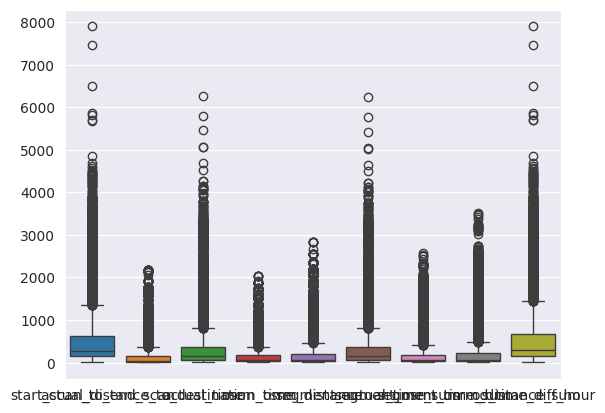

In [ ]:
sns.boxplot(data=trip_df, x=num_cols)
plt.show()

> Each numerical variables has outlier and there are many

In [ ]:
def outlier_iqr(df, columns):
  for col in columns:
    #outlier detection
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1
    lower_bound = (Q1 - 1.5 * IQR)
    upper_bound = (Q3 + 1.5 * IQR)

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # standard = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    print("column name:"+ col, len(outliers))

In [ ]:
outlier_iqr(trip_df, num_cols)

column name:start_scan_to_end_scan 1282
column name:actual_distance_to_destination 1452
column name:actual_time 1646
column name:osrm_time 1506
column name:osrm_distance 1522
column name:segment_actual_time_sum 1644
column name:segment_osrm_time_sum 1485
column name:segment_osrm_distance_sum 1550
column name:od_time_diff_hour 1116


- There are **more than 1K outliers** for each variable, as calculated using IQR.
- We will exclude those from our data

In [ ]:
def remove_outliers_iqr(df, columns):
    bounds = {}
    for col in columns:
        #outlier detection
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1
        lower_bound = (Q1 - 1.5 * IQR)
        upper_bound = (Q3 + 1.5 * IQR)
        bounds[col] = (lower_bound, upper_bound)

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print("column name:"+ col, len(outliers))
        # print(len(df))

     # Filter the dataframe using the precomputed bounds
    for col, (lower_bound, upper_bound) in bounds.items():
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [ ]:
trip_df_cleaned = remove_outliers_iqr(trip_df, num_cols)

column name:start_scan_to_end_scan 1282
column name:actual_distance_to_destination 1452
column name:actual_time 1646
column name:osrm_time 1506
column name:osrm_distance 1522
column name:segment_actual_time_sum 1644
column name:segment_osrm_time_sum 1485
column name:segment_osrm_distance_sum 1550
column name:od_time_diff_hour 1116


trip_df_cleaned contains data where ever the outlier existed in a given row

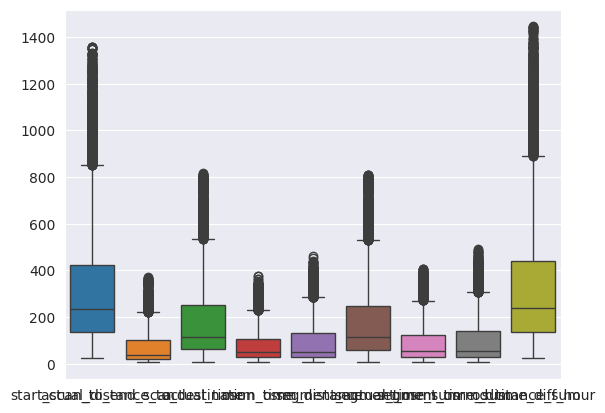

In [ ]:
# it still has outliers, of less magnitude
sns.boxplot(data=trip_df_cleaned[num_cols])
plt.show()

Even after removing outliers, from the initial data. Our new data stil has ouliers. The extreme values are surely removed.

We can't keep on removing data, as we will loose valuable data

### Applying log transformation to data

Since we are unable to remove outliers and the data is still right skewed we will apply log transformation to the data.

`np.log` function is used to transform the data, adding 1 ensures that zero values are transformed safely, as log(0) is undefined.

In [ ]:
# Apply log transformation to all numeric columns
trip_df_cleaned[num_cols] = trip_df_cleaned[num_cols].apply(lambda x: np.log(x + 1))

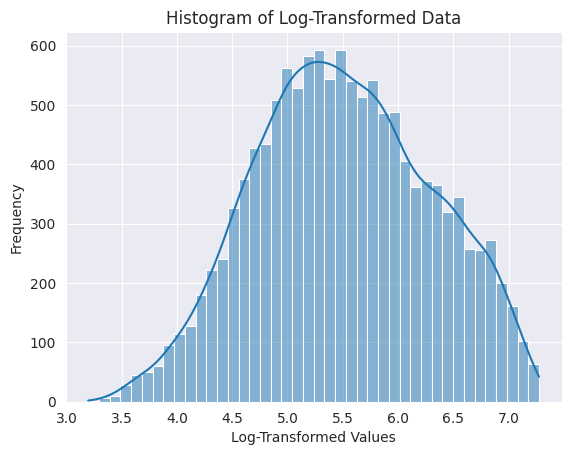

In [ ]:
sns.histplot(trip_df_cleaned['od_time_diff_hour'], kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Frequency')
plt.show()

### Normalizing using a MinMaxScaler

Applying MinMaxScaler to transform features and scale them between 0 to 1. Since all the values have same range after transformation, MinMaxScaler makes sure that no single feature has more influence than others during training.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

# Apply MinMaxScaler to all numeric columns
trip_df_cleaned[num_cols] = trip_df_cleaned[num_cols].apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

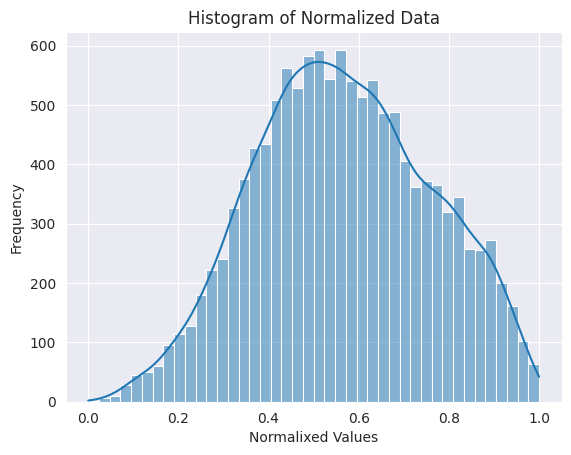

In [ ]:
sns.histplot(trip_df_cleaned['od_time_diff_hour'], kde=True)
plt.title('Histogram of Normalized Data')
plt.xlabel('Normalixed Values')
plt.ylabel('Frequency')
plt.show()

**One hot encoding** of categorical variables like `route_type`. This helps machine learning algorithms to identify patterns in data for better predictions  

In [ ]:
# get_dummies for one hot encoding variable
trip_df_cleaned = pd.get_dummies(trip_df_cleaned, columns=['route_type'], dtype=int)
trip_df_cleaned

,trip_uuid,trip_creation_time,route_schedule_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,dest_state,dest_city,dest_place,dest_code,source_state,source_city,source_place,source_code,trip_month,trip_hour,trip_day,trip_dayofweek,route_type_Carting,route_type_FTL
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0.500824,0.553126,0.605936,0.574010,0.560102,0.603602,0.551586,0.549455,0.492739,karnataka,doddablpur,chikadpp,d,karnataka,tumkur,veersagr,i,9,0,12,2,1,0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0.356217,0.164862,0.407049,0.207378,0.187759,0.407618,0.218128,0.187553,0.348772,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,9,0,12,2,1,0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0.842393,0.704658,0.802445,0.708614,0.701099,0.802901,0.690220,0.691237,0.828783,karnataka,hospet,hospet,none,karnataka,bellary,bellary,dc,9,0,12,2,0,1
5,trip-153671055416136166,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,0.512852,0.259384,0.414498,0.309092,0.276601,0.411378,0.302901,0.272710,0.504372,tamil nadu,chennai,chennai,poonamallee,tamil nadu,chennai,porur,dpc,9,0,12,2,1,0
6,trip-153671066201138152,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,0.351260,0.002693,0.208161,0.173881,0.066957,0.208452,0.170398,0.066015,0.342685,tamil nadu,chennai,vandalur,dc,tamil nadu,chennai,chrompet,dpc,9,0,12,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,0.588687,0.488784,0.483488,0.551189,0.522166,0.481440,0.540150,0.483207,0.688874,punjab,zirakpur,zirakpur,dc,punjab,chandigarh,mehmdpur,h,10,23,3,2,1,0
14783,trip-153861104386292051,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,0.231226,0.138399,0.179120,0.155290,0.137961,0.179371,0.132503,0.136022,0.226338,haryana,faridabad,blbgarh,dc,haryana,fbd,balabhgarh,dpc,10,23,3,2,1,0
14784,trip-153861106442901555,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,0.710655,0.380427,0.759426,0.488145,0.465377,0.759682,0.625086,0.605427,0.698705,uttar pradesh,kanpur,govndngr,dc,uttar pradesh,kanpur,central,6,10,23,3,2,1,0
14785,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,0.662863,0.719866,0.744496,0.814544,0.740861,0.740327,0.849787,0.798866,0.651860,tamil nadu,eral,busstand,d,tamil nadu,tirunelveli,vdkkusrt,i,10,23,3,2,1,0


In [ ]:
trip_df_cleaned.to_excel('delhivery_trip_clean.xlsx', index=False)

## Hypothesis testing
Testing if there is a difference in mean of time and distance of actual and estimated/predicted values.

### Time Difference

Difference between od_time_diff_hour and start_scan_to_end_scan.

**Null Hypothesis (H0):** od_time_diff_hour mean is equal to start_scan_to_end_scan mean.
$$ H_0: \mu_{Order Time Diff} = \mu_{Scan Time Diff} $$
The null hypothesis states that there is no significant difference between the mean of Order time difference and Start to end scan difference

**Alternative Hypothesis (H1):** od_time_diff_hour mean is not equal to start_scan_to_end_scan mean.
$$
H_1: \mu_{Order Time Diff} \neq \mu_{Scan Time Diff} $$
The alternative hypothesis states that there is a significant difference between the mean of Order time difference and Start to end scan difference.

Consider the significance level $\alpha = 0.05$.

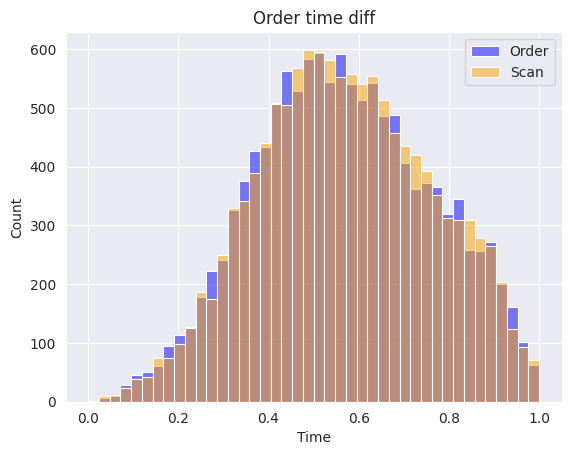

In [ ]:
sns.histplot(data=trip_df_cleaned, x="od_time_diff_hour", label='Order',
             alpha=0.5, color='Blue')
sns.histplot(data=trip_df_cleaned, x="start_scan_to_end_scan", label='Scan',
             alpha=0.5, color='Orange')

# Adding titles and labels
plt.title('Order time diff')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

> The histogram plot shows there mean are identical.

In [ ]:
sample_indices = np.random.choice(trip_df_cleaned.index, size=300, replace=False)

sample_scan = trip_df_cleaned.loc[sample_indices].start_scan_to_end_scan.to_list()
sample_od = trip_df_cleaned.loc[sample_indices].od_time_diff_hour.to_list()

In [ ]:
# sample_scan
from scipy.stats import ttest_ind

#H0 = There is no significant difference in mean purchase of males and females
#H1 = Mean purchase of females is less than males

t_stat, pvalue = ttest_ind(sample_scan, sample_od, alternative = "two-sided")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of start to end scan time is different than order start to end time")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of start to end scan time and order start to end time')

t_stat: 0.17374288848051478, pval: 0.8621263267924791
Failed to reject null hypothesis. There is no significant difference in mean of start to end scan time and order start to end time


#### Conclusion:
Between scan and order time difference, the p value is greater than 0.05.

**Failing to Reject the Null Hypothesis:** The p-value is above the significance level of 0.05, so we fail to reject the null hypothesis in these cases

The Order and Scan total times don't have significant difference in their mean.

This suggests that the **mean** of total time from **Orders** and **Scan** - start to end time is **statistically similar**. This implies that the both time measured are consistent with each other.

**Insight:** System recorded time i.e. order start to end time and delivery recorded time start scan to end scan time are similar.

### Time Measures

Framework for Hypothesis testing between Time varibles or Distance varibles

**Null Hypothesis (H0):** `Variable1` mean is equal to `Variable2` mean.
$$ H_0: \mu_{Variable1} = \mu_{Variable2} $$
The null hypothesis states that there is no significant difference between the mean of `Variable1` and `Variable2`.

**Alternative Hypothesis (H1):** `Variable1` mean is not equal to `Variable2` mean.
$$
H_1: \mu_{Variable1} \neq \mu_{Variable2} $$
The alternative hypothesis states that there is a significant difference between the mean of `Variable1` and `Variable2` difference.

Consider the significance level $\alpha = 0.05$.

In [ ]:
import plotly.graph_objects as go

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
sample_indices = np.random.choice(trip_df_cleaned.index, size=300, replace=False)

sample_actual_time = trip_df_cleaned.loc[sample_indices].actual_time.to_list()
sample_osrm_time = trip_df_cleaned.loc[sample_indices].osrm_time.to_list()

sample_seg_actual_time = trip_df_cleaned.loc[sample_indices].segment_actual_time_sum.to_list()
sample_seg_osrm_time = trip_df_cleaned.loc[sample_indices].segment_osrm_time_sum.to_list()

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Actual time V/S OSRM time", "Segment actual time V/S Segment OSRM time",
                                    "Actual time V/S Segment actual time", "OSRM time V/S Segment OSRM time"),
                    specs=[[{"type": "histogram"}, {"type": "histogram"}],
                           [{"type": "histogram"}, {"type": "histogram"}]])

# Add histograms to the subplots
fig.add_trace(go.Histogram(x=sample_actual_time, name='Actual time', opacity=0.75), row=1, col=1)
fig.add_trace(go.Histogram(x=sample_osrm_time, name='OSRM time', opacity=0.75), row=1, col=1)

fig.add_trace(go.Histogram(x=sample_seg_actual_time, name='Segment actual time', opacity=0.75), row=1, col=2)
fig.add_trace(go.Histogram(x=sample_seg_osrm_time, name='Segment OSRM time', opacity=0.75), row=1, col=2)

fig.add_trace(go.Histogram(x=sample_actual_time, name='Actual time', opacity=0.75), row=2, col=1)
fig.add_trace(go.Histogram(x=sample_seg_actual_time, name='Segment actual time', opacity=0.75), row=2, col=1)

fig.add_trace(go.Histogram(x=sample_osrm_time, name='OSRM time', opacity=0.75), row=2, col=2)
fig.add_trace(go.Histogram(x=sample_seg_osrm_time, name='Segment OSRM time', opacity=0.75), row=2, col=2)

# Update layout
fig.update_layout(title_text='Histograms of time values of different variables', barmode='overlay')

# Show the figure
fig.show()

In [ ]:
#H0 = There is no significant difference in mean of Actual and OSRM time
#H1 = Mean of Actual time is greater than mean of OSRM time

t_stat, pvalue = ttest_ind(sample_actual_time, sample_osrm_time, alternative = "greater")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of actual time is greater than OSRM time")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of actual time and OSRM time')

t_stat: 3.369186471100545, pval: 0.0004012071118119432
Rejecting null hypothesis. Sample mean of actual time is greater than OSRM time


In [ ]:
#H0 = There is no significant difference in mean of Segment Actual and Segment OSRM time
#H1 = Mean of Segment Actual time is greater than mean of Segment OSRM time

t_stat, pvalue = ttest_ind(sample_seg_actual_time, sample_seg_osrm_time, alternative = "greater")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of Segment Actual time is greater than Segment OSRM time")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of Segment Actual and Segment OSRM time')

t_stat: 2.8732658342779986, pval: 0.0021033763684174217
Rejecting null hypothesis. Sample mean of Segment Actual time is greater than Segment OSRM time


In [ ]:
#H0 = There is no significant difference in mean of Actual time and Segment Actual time
#H1 = Mean of Actual time is different than mean of Segment Actual time

t_stat, pvalue = ttest_ind(sample_actual_time, sample_seg_actual_time, alternative = "two-sided")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of Actual time is different than Segment Actual time")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of Actual and Segment Actual time')

t_stat: 0.09273721043237786, pval: 0.9261433941175996
Failed to reject null hypothesis. There is no significant difference in mean of Actual and Segment Actual time


In [ ]:
#H0 = There is no significant difference in mean of OSRM time and Segment OSRM time
#H1 = Mean of OSRM time is different than mean of Segment OSRM time

t_stat, pvalue = ttest_ind(sample_osrm_time, sample_seg_osrm_time, alternative = "two-sided")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of OSRM time is different than Segment OSRM time")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of OSRM and Segment OSRM time')

t_stat: -0.45473213940378815, pval: 0.6494669822439713
Failed to reject null hypothesis. There is no significant difference in mean of OSRM and Segment OSRM time


#### Conclusion:
**Reject the Null Hypothesis:** The p-value is below the significance level of 0.05, so we reject the null hypothesis in these cases.
There is **significant difference** in **mean** of **Actual and OSRM time**,
also between **Segment's actual and OSRM time**.

**Failing to Reject the Null Hypothesis:** The p-value is above the significance level of 0.05, so we fail to reject the null hypothesis in these cases.
There is **no** significant difference between **Actual and Segment's Actual time**, also between **OSRM and Segment's OSRM** recorded time mean.

**Insight:**
1. Total or in segments, Actual time taken for delivery is greater than OSRM calculated/predicted time.

2. Actual total and segment time are equal when aggregated. same goes for OSRM. This means the there is no delay in segments for actual and osrm times. And in addition we can say that OSRM predicted times are better at dividing time for each segment.

**Recommendation:**
1. There is need for improvement in open-source routing engine computation.


### Distance

In [ ]:
sample_indices = np.random.choice(trip_df_cleaned.index, size=300, replace=False)

sample_actual_dist = trip_df_cleaned.loc[sample_indices].actual_distance_to_destination.to_list()
sample_osrm_dist = trip_df_cleaned.loc[sample_indices].osrm_distance.to_list()
sample_seg_osrm_dist = trip_df_cleaned.loc[sample_indices].segment_osrm_distance_sum.to_list()

In [ ]:
# Create subplots
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Actual Distance V/S OSRM Distance",
                                    "Actual Distance V/S Segment OSRM Distance",
                                    "OSRM Distance V/S Segment OSRM Distance"),
                    specs=[[{"type": "histogram"}, {"type": "histogram"}],
                          [{"type": "histogram"}, {"type": "histogram"}]])

# Add histograms to the subplots
fig.add_trace(go.Histogram(x=sample_actual_dist, name='Actual Distance', opacity=0.75), row=1, col=1)
fig.add_trace(go.Histogram(x=sample_osrm_dist, name='OSRM Distance', opacity=0.75), row=1, col=1)

fig.add_trace(go.Histogram(x=sample_actual_dist, name='Actual Distance', opacity=0.75), row=1, col=2)
fig.add_trace(go.Histogram(x=sample_seg_osrm_dist, name='Segment OSRM Distance', opacity=0.75), row=1, col=2)

fig.add_trace(go.Histogram(x=sample_osrm_dist, name='OSRM Distance', opacity=0.75), row=2, col=1)
fig.add_trace(go.Histogram(x=sample_seg_osrm_dist, name='Segment OSRM Distance', opacity=0.75), row=2, col=1)

# Upd1te layout
fig.update_layout(title_text='Histograms of Distance values of different variables', barmode='overlay')

# Show the figure
fig.show()

In [ ]:
#H0 = There is no significant difference in mean of Actual and OSRM Distance
#H1 = Mean of Actual Distance is less than mean of OSRM Distance

t_stat, pvalue = ttest_ind(sample_actual_dist, sample_osrm_dist, alternative = "less")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of Actual Distance is less than OSRM Distance")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of Actual Distance and OSRM Distance')

t_stat: -2.1621269409769424, pval: 0.015502137496226738
Rejecting null hypothesis. Sample mean of Actual Distance is less than OSRM Distance


In [ ]:
#H0 = There is no significant difference in mean of Actual Distance and Segment OSRM Distance
#H1 = Mean of Actual Distance is less than mean of Segment OSRM Distance

t_stat, pvalue = ttest_ind(sample_actual_dist, sample_seg_osrm_dist, alternative = "less")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of Actual Distance is less than Segment OSRM Distance")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of Actual and Segment OSRM Distance')

t_stat: -2.9951816042561803, pval: 0.0014281557451375742
Rejecting null hypothesis. Sample mean of Actual Distance is less than Segment OSRM Distance


In [ ]:
#H0 = There is no significant difference in mean of OSRM Distance and Segment OSRM Distance
#H1 = Mean of OSRM Distance is different than mean of Segment OSRM Distance

t_stat, pvalue = ttest_ind(sample_osrm_dist, sample_seg_osrm_dist, alternative = "two-sided")
print(f't_stat: {t_stat}, pval: {pvalue}')

if pvalue < 0.05:
  print("Rejecting null hypothesis. Sample mean of OSRM Distance is different than Segment OSRM Distance")
else:
  print('Failed to reject null hypothesis. There is no significant difference in mean of OSRM and Segment OSRM Distance')

t_stat: -0.8483821506734492, pval: 0.3965646361135675
Failed to reject null hypothesis. There is no significant difference in mean of OSRM and Segment OSRM Distance


#### Conclusion:
**Reject the Null Hypothesis:** The p-value is below the significance level of 0.05, so we reject the null hypothesis in these cases.
There is **significant difference** in **mean** of **Actual and OSRM Distance**,
also between **Segment's actual and OSRM distance**.

**Failing to Reject the Null Hypothesis:** The p-value is above the significance level of 0.05, so we fail to reject the null hypothesis in these cases.
There is **no** significant difference between **OSRM and Segment's OSRM** recorded distance means.

**Insights**
1. Actual distance covered in a trip is less than OSRM and Segment OSRM distance. This means there are drivers are taking a shorter routes than predicted, either the system is predicting low because of the Optimal routes in maps are different than actual. Or the drives are taking short cuts in between to cut distance

2. osrm and Segment osrm dist are nearly same, this show the predicted value for the whole trip is equal to the sum of predict value of
each segment

3. This means the system is good at dividing the distance for each segment.But this still varies with actual time, so it can pe trained more to be more precise.

4. Earlier we saw that the time taken to reach distance is greater than the predicted. and now we found that actual distance covered is shorter than the predicted.
Either the system is predicting wrong time or the driver is stalling more time.

**Recommendation:**
1. Shortcuts can be harsh on products, as the routes are not well developed and may damage the goods in transport. either make drivers follow the prescribed routes or check system to there are actually shorter routes to destination  

2. The difference is coming between the actual and osrm distance, the system need to have better gps providers for better distance calculation

3. Make system predictions better to calculate time or
improve routes maps and make driver follow them for secured delivery

## Corridors

> Groupby source and destination names while counting the total number of trips created, this gives us the busiest/ most working source and destinations

- add or scale infra in busiest corridors to cater more demand and supply
- Improve infra in low/ least active states or corridors for business expansion

In [ ]:
trip_df['source_city'] = trip_df['source_city'].replace('bangalore', 'bengaluru')
trip_df['dest_city'] = trip_df['dest_city'].replace('bangalore', 'bengaluru')

In [ ]:
trip_agg_dict2 = {
    'route_type' : 'first',
    'trip_uuid' : 'count',

    # segment data not needed, as seen above the aggregate values are similar to that of complete trip
    'actual_distance_to_destination' : 'mean',
    'osrm_distance' : 'mean',
    'actual_time' : 'mean',
    'osrm_time' : 'mean',
}

In [ ]:
## aggregate
trip_df_agg_state = trip_df.groupby(['source_state', 'dest_state']).agg(trip_agg_dict2).reset_index()
trip_df_agg_city = trip_df.groupby(['source_city', 'dest_city']).agg(trip_agg_dict2).reset_index()
trip_df_agg_place = trip_df.groupby(['source_place', 'dest_place']).agg(trip_agg_dict2).reset_index()

### Busiest States:

In [ ]:
# ignore the column name, trip_uuid is count of trips
state_corridors = trip_df_agg_state.sort_values(by=['trip_uuid'], ascending=False)
state_corridors

,source_state,dest_state,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
87,maharashtra,maharashtra,Carting,2429,67.108775,82.792890,176.083162,65.217373
63,karnataka,karnataka,Carting,2088,63.796461,80.254476,152.880747,75.222701
113,tamil nadu,tamil nadu,Carting,1015,69.520728,86.695857,152.067980,78.829557
41,haryana,haryana,Carting,783,57.376009,74.909380,146.071520,66.418902
32,gujarat,gujarat,Carting,669,109.753293,134.274249,225.587444,108.820628
...,...,...,...,...,...,...,...,...
132,west bengal,bihar,FTL,1,1302.944305,1467.697300,2238.000000,1062.000000
30,gujarat,daman & diu,Carting,1,9.376028,10.292100,43.000000,11.000000
11,assam,tripura,FTL,1,183.023569,283.819000,674.000000,204.000000
20,delhi,assam,FTL,1,1461.480857,1809.288800,3306.000000,1318.000000


In [ ]:
state_corridors[state_corridors['route_type'] == 'Carting'].head().reset_index()

,index,source_state,dest_state,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
0,87,maharashtra,maharashtra,Carting,2429,67.108775,82.792890,176.083162,65.217373
1,63,karnataka,karnataka,Carting,2088,63.796461,80.254476,152.880747,75.222701
2,113,tamil nadu,tamil nadu,Carting,1015,69.520728,86.695857,152.067980,78.829557
3,41,haryana,haryana,Carting,783,57.376009,74.909380,146.071520,66.418902
4,32,gujarat,gujarat,Carting,669,109.753293,134.274249,225.587444,108.820628


In [ ]:
state_corridors[state_corridors['route_type'] == 'FTL'].head().reset_index()

,index,source_state,dest_state,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
0,121,telangana,telangana,FTL,641,81.019668,102.099696,190.981279,81.843994
1,22,delhi,haryana,FTL,451,183.717773,219.685147,368.006652,174.467849
2,104,punjab,punjab,FTL,388,130.737108,151.712368,260.603093,117.097938
3,13,bihar,bihar,FTL,342,133.228762,167.074547,461.570175,125.052632
4,76,madhya pradesh,madhya pradesh,FTL,275,153.488622,190.259180,367.607273,156.061818


In [ ]:
# Filter out rows where source_state is the same as dest_state
state_corridors[state_corridors['source_state'] != state_corridors['dest_state']].head(10)

,source_state,dest_state,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
22,delhi,haryana,FTL,451,183.717773,219.685147,368.006652,174.467849
39,haryana,delhi,Carting,307,42.837200,52.147860,119.016287,52.960912
52,haryana,uttar pradesh,FTL,140,219.953564,281.140029,483.907143,241.200000
25,delhi,uttar pradesh,FTL,110,242.562314,295.495880,463.581818,228.345455
97,punjab,chandigarh,Carting,84,86.171230,108.547087,165.523810,99.642857
49,haryana,rajasthan,FTL,84,196.981519,231.606101,360.809524,185.107143
99,punjab,haryana,Carting,80,814.712288,984.075622,1429.662500,724.100000
48,haryana,punjab,FTL,72,182.007852,213.716932,362.250000,160.694444
123,uttar pradesh,delhi,Carting,68,66.770931,84.111674,182.397059,68.044118
100,punjab,himachal pradesh,FTL,59,195.624328,305.672166,721.355932,289.491525


**Insights:**
1. The busiest states in **delivery route type carting** are **Maharashtra** and **Karnataka**, with more than **2000 trip creations** recorded.
  - The **average distance** for trips with **Maharashtra** as the source and destination is nearly **70 kilometers**, and the **time taken** is nearly **180 hours**.
  - For **Karnataka**, the average distance is nearly **60 kilometers**, and the time taken is nearly **150 hours**.

2. The busiest states in **delivery route type FTL** are **Telangana, Delhi,** and **Haryana**, with nearly **500 trips** created.
  - The **average distance** for trips between **Telangana** as the source and destination is nearly **80 kilometers**, and the time taken is nearly **190 hours**.
  - The **average distance** from **Delhi to Haryana** is **180 kilometers**, and the time taken is nearly **360 hours**.

3. When considering **interstate trips**, whether in **FTL** or **carting**, **Delhi and Haryana** are the top states, followed by **Uttar Pradesh**.

**Recommendation:**
1. Focus on improving delivery efficiency by **optimizing routes** in Maharashtra and Karnataka, as these states see the **highest** number of **trips** for the carting route type.
2. For FTL route types, prioritize **better planning and coordination** for Delhi-Haryana and Telangana trips, as they have the **longest average distances and times**.

### Busiest Cities

In [ ]:
city_corridors = trip_df_agg_city.sort_values(by=['trip_uuid'], ascending=False)
city_corridors

,source_city,dest_city,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
142,bengaluru,bengaluru,Carting,1356,38.079435,49.010033,100.463127,51.938053
207,bhiwandi,mumbai,Carting,407,26.360071,36.093297,97.103194,30.002457
605,hyderabad,hyderabad,Carting,308,25.250009,33.239790,105.051948,27.275974
356,delhi,gurgaon,FTL,248,301.834172,358.949002,585.564516,274.979839
502,gurgaon,delhi,Carting,237,45.666973,55.069147,118.004219,56.924051
...,...,...,...,...,...,...,...,...
452,ghosi,dohrighat,FTL,1,39.885662,41.676400,102.000000,29.000000
872,makrana,merta,FTL,1,81.847813,128.964600,215.000000,103.000000
739,karnaprayag,chamoli,FTL,1,71.146823,122.303100,964.000000,183.000000
472,gooty,guntakal,FTL,1,100.770084,126.930300,262.000000,119.000000


In [ ]:
city_corridors[city_corridors['route_type'] == 'Carting'].head(5).reset_index()

,index,source_city,dest_city,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
0,142,bengaluru,bengaluru,Carting,1356,38.079435,49.010033,100.463127,51.938053
1,207,bhiwandi,mumbai,Carting,407,26.360071,36.093297,97.103194,30.002457
2,605,hyderabad,hyderabad,Carting,308,25.250009,33.239790,105.051948,27.275974
3,502,gurgaon,delhi,Carting,237,45.666973,55.069147,118.004219,56.924051
4,947,mumbai hub,mumbai,Carting,227,16.341615,21.382668,56.938326,18.114537


In [ ]:
city_corridors[city_corridors['route_type'] == 'FTL'].head(5).reset_index()

,index,source_city,dest_city,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
0,356,delhi,gurgaon,FTL,248,301.834172,358.949002,585.564516,274.979839
1,1077,pune,bhiwandi,FTL,75,150.296806,187.544644,308.173333,143.373333
2,211,bhiwandi,pune,FTL,72,207.395693,257.221804,411.805556,192.236111
3,280,chandigarh,gurgaon,FTL,66,952.188633,1155.159839,1678.742424,850.090909
4,513,gurgaon,jaipur,FTL,50,195.837108,221.279586,312.080000,168.520000


**Insights:** (Similar analysis as done above for state)

1. The busiest **city-to-city corridors** for **delivery route type carting** are **Bengaluru**, **Bhiwandi to Mumbai**, and **Hyderabad**.
  - **Intercity Bengaluru** trips are the highest, with more than **1.3k trips**.
  - Next is **Bhiwandi to Mumbai** with **400 trips**, followed by **intercity Hyderabad** with **300 trips**.
  - The **average distance** for Bengaluru trips is **40 km**, for Mumbai it is **30 km**, and for Hyderabad, it is **25 km**. All three cities have the same **average time of 100 hours**.

2. Clearly, **Bengaluru** is contributing the most to Delhivery’s operations.

3. The busiest **city-to-city corridor** for **delivery route type FTL** is from **Delhi to Gurgaon** and **Pune to Bhiwandi**.
  - For **Delhi to Gurgaon**, there are nearly **250 trips** created.
    - The **average distance** between **Delhi and Gurgaon** is **300 km**, with a time of nearly **580 hours**.
  - The **average distance** between **Pune and Bhiwandi** is **150 km**, and the time taken is **300 hours**.

 **Recommendation:**
 1. Scaling up delivery resources such as **fleet size** and **logistics infrastructure** in **Bengaluru** to meet increasing demand and supply needs in this busiest city.
 2. Introducing **better route planning** for **Delhi to Gurgaon** and **Pune to Bhiwandi** routes, as these corridors have significant distances and long delivery times (580 hours and 300 hours, respectively).

### Top Place to Place Delhivery

In [ ]:
top_places = trip_df_agg_place.sort_values(by=['trip_uuid'], ascending=False)
top_places

,source_place,dest_place,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
282,central,central,Carting,216,144.419739,189.573510,493.324074,144.865741
1113,nelmngla,kgairprt,Carting,151,28.022125,38.078472,87.874172,48.046358
1102,nelmngla,bomsndra,Carting,127,97.889791,130.128139,210.409449,121.921260
236,bomsndra,kgairprt,Carting,121,41.727380,53.130012,114.661157,56.743802
764,kgairprt,nelmngla,Carting,108,28.084732,40.692069,105.231481,50.333333
...,...,...,...,...,...,...,...,...
797,kotwalin,central,Carting,1,61.244922,70.694400,2536.000000,50.000000
800,kovaipudur,west,Carting,1,36.549555,43.101200,178.000000,50.000000
809,kundapura,kmkshbul,FTL,1,159.604727,205.212800,333.000000,183.000000
812,kundli,barout,FTL,1,51.334399,63.644800,124.000000,54.000000


In [ ]:
top_places[top_places['route_type'] == 'Carting'].head(10).reset_index()
# Nelamangala
# since the distance are close, they all are cities of karnataka near, bengaluru
# Bommasandra
# Kempegowda International airport
## report with the above names

,index,source_place,dest_place,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
0,282,central,central,Carting,216,144.419739,189.573510,493.324074,144.865741
1,1113,nelmngla,kgairprt,Carting,151,28.022125,38.078472,87.874172,48.046358
2,1102,nelmngla,bomsndra,Carting,127,97.889791,130.128139,210.409449,121.921260
3,236,bomsndra,kgairprt,Carting,121,41.727380,53.130012,114.661157,56.743802
4,764,kgairprt,nelmngla,Carting,108,28.084732,40.692069,105.231481,50.333333
5,901,mankoli,mumbai,Carting,105,21.362172,27.157933,61.285714,22.314286
6,529,gateway,bilaspur,Carting,100,663.402259,787.420007,1109.670000,588.280000
7,405,chndivli,mankoli,Carting,99,20.117543,25.605966,80.868687,20.868687
8,179,bilaspur,kundli,Carting,92,70.133302,98.093527,216.456522,97.445652
9,238,bomsndra,nelmngla,Carting,89,90.909833,105.577029,175.067416,102.775281


In [ ]:
top_places[top_places['route_type'] == 'FTL'].head(5).reset_index()

,index,source_place,dest_place,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time
0,1474,tathawde,mankoli,FTL,75,150.296806,187.544644,308.173333,143.373333
1,910,mankoli,tathawde,FTL,72,207.395693,257.221804,411.805556,192.236111
2,935,mehmdpur,bilaspur,FTL,66,952.188633,1155.159839,1678.742424,850.090909
3,188,bilaspur,nelmngla,FTL,47,1689.690467,2063.938606,2910.000000,1508.340426
4,1100,nelmngla,bilaspur,FTL,45,1779.290286,2179.112896,3019.400000,1607.911111


**Insights:** (Similar analysis as done above for state and city)

1. The busiest **place-to-place delivery** for **route type carting** is between **Nelamangala**, **Kempegowda International Airport**, and **Bommasandra**.
  - Ignoring "Central" as it is a place mentioned for many cities and states.
  - The **average distance** between **Nelamangala** and **Kempegowda International Airport** is **30 km**, with a time of nearly **90 hours**.
  - The **average distance** between **Nelamangala** and **Bommasandra** is **100 km**, taking nearly **210 hours**.
  - The **average distance** between **Bommasandra** and **Kempegowda** is **40 km**, with a time of **110 hours**.

2. The busiest **place-to-place delivery** for **route type FTL** is from **Tathawade to Mankoli**, the return route from **Mankoli to Tathawade**, and **Mehmadpur to Bilaspur**.
  - The **average distance** between **Tathawade and Mankoli** is **150 km**, with a time of **300 hours**.
  - The **average distance** for the **return journey** is **200 km**, with a time of **400 hours**.
  - There seems to be an error in routing between **Tathawade and Mankoli**, as the average distances for the onward and return trips are different.
  - The **average distance** between **Mehmadpur and Bilaspur** is **950 km**, taking **1600 hours**.

**Recommendation:**
1. Given the high demand in places like **Nelamangala, Kempegowda International Airport, and Bommasandra**, consider **expanding warehouse capacity** in these regions by building larger or additional warehouses to better manage the high volume of deliveries.


### OSRM Computation Difference
Extra features have been created to calculate the effectiveness of **OSRM predictions** on time and distance taken.
1. We have created the **dist_diff** variable to calculate the difference between **actual distance** and **OSRM distance**.
2. We also created the **time_diff** variable to calculate the difference between **actual time** and **OSRM time**.


In [ ]:
trip_df_agg_city['dist_diff']  = np.abs(trip_df_agg_city['actual_distance_to_destination'] - trip_df_agg_city['osrm_distance'])
trip_df_agg_city['time_diff']  = np.abs(trip_df_agg_city['actual_time'] - trip_df_agg_city['osrm_time'])

trip_df_agg_place['dist_diff']  = np.abs(trip_df_agg_place['actual_distance_to_destination'] - trip_df_agg_place['osrm_distance'])
trip_df_agg_place['time_diff']  = np.abs(trip_df_agg_place['actual_time'] - trip_df_agg_place['osrm_time'])

In [ ]:
trip_df_agg_city.sort_values(by=['dist_diff'], ascending=False).head(10)

,source_city,dest_city,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,dist_diff,time_diff
540,guwahati,kolkata,FTL,6,1867.892099,2524.958333,4873.333333,1807.333333,657.066234,3066.000000
518,gurgaon,maa,FTL,14,1721.280753,2190.494436,3117.642857,1610.357143,469.213683,1507.285714
145,bengaluru,bhopal,FTL,13,1562.502750,2019.493908,2892.230769,1480.000000,456.991158,1412.230769
788,kolkata,guwahati,FTL,8,510.519033,953.675438,2342.000000,687.000000,443.156405,1655.000000
529,gurgaon,vijayawada,FTL,11,1593.923778,2015.321691,2961.272727,1513.363636,421.397913,1447.909091
151,bengaluru,gurgaon,FTL,45,1779.290286,2179.112896,3019.400000,1607.911111,399.822610,1411.488889
272,chandigarh,bengaluru,FTL,1,1927.447705,2326.199100,3784.000000,1686.000000,398.751395,2098.000000
603,hyderabad,gurgaon,FTL,1,1237.221775,1635.114000,2559.000000,1191.000000,397.892225,1368.000000
846,maa,hyderabad,FTL,7,1136.177310,1529.455686,2212.428571,1091.571429,393.278376,1120.857143
598,hyderabad,bhopal,FTL,15,1086.543315,1463.121153,2140.333333,1042.733333,376.577839,1097.600000


In [ ]:
trip_df_agg_city.sort_values(by=['time_diff'], ascending=False).head(10)

,source_city,dest_city,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,dist_diff,time_diff
540,guwahati,kolkata,FTL,6,1867.892099,2524.958333,4873.333333,1807.333333,657.066234,3066.000000
470,gonda,tulsipur,Carting,1,61.244922,70.694400,2536.000000,50.000000,9.449478,2486.000000
1045,pappadahandi,visakhapatnam,Carting,1,196.451691,293.327100,2541.000000,211.000000,96.875409,2330.000000
488,guna,ashokngr,FTL,1,95.438286,120.125900,2360.000000,120.000000,24.687614,2240.000000
272,chandigarh,bengaluru,FTL,1,1927.447705,2326.199100,3784.000000,1686.000000,398.751395,2098.000000
534,guwahati,delhi,FTL,17,1463.115839,1807.978371,3370.294118,1323.117647,344.862532,2047.176471
357,delhi,guwahati,FTL,1,1461.480857,1809.288800,3306.000000,1318.000000,347.807943,1988.000000
520,gurgaon,muzaffrpur,FTL,19,2011.824628,2353.459121,3627.947368,1723.947368,341.634493,1904.000000
212,bhiwandi,ranchi,FTL,4,1532.561446,1859.852750,3232.750000,1334.000000,327.291304,1898.750000
274,chandigarh,bhiwandi,FTL,1,1295.867861,1584.140900,2891.000000,1140.000000,288.273039,1751.000000


In [ ]:
trip_df_agg_place.sort_values(by=['dist_diff'], ascending=False).head(5)

,source_place,dest_place,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,dist_diff,time_diff
578,guwahati,dankuni,FTL,6,1867.892099,2524.958333,4873.333333,1807.333333,657.066234,3066.000000
190,bilaspur,poonamallee,FTL,14,1721.280753,2190.494436,3117.642857,1610.357143,469.213683,1507.285714
1123,nelmngla,trnsport,FTL,13,1562.502750,2019.493908,2892.230769,1480.000000,456.991158,1412.230769
440,dankuni,guwahati,FTL,8,510.519033,953.675438,2342.000000,687.000000,443.156405,1655.000000
196,bilaspur,rynapadu,FTL,11,1593.923778,2015.321691,2961.272727,1513.363636,421.397913,1447.909091


In [ ]:
trip_df_agg_place.sort_values(by=['time_diff'], ascending=False).head(5)
# city and place gave same output, as city and place are for the same trip

,source_place,dest_place,route_type,trip_uuid,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,dist_diff,time_diff
578,guwahati,dankuni,FTL,6,1867.892099,2524.958333,4873.333333,1807.333333,657.066234,3066.0
797,kotwalin,central,Carting,1,61.244922,70.694400,2536.000000,50.000000,9.449478,2486.0
294,central,gajuwaka,Carting,1,196.451691,293.327100,2541.000000,211.000000,96.875409,2330.0
609,hnumndpp,bypassrd,FTL,1,95.438286,120.125900,2360.000000,120.000000,24.687614,2240.0
951,mehmdpur,nelmngla,FTL,1,1927.447705,2326.199100,3784.000000,1686.000000,398.751395,2098.0


**Insights on effectiveness of OSRM Predictions**

1. For **Guwahati to Dankuni**, the system has predicted the distance incorrectly by about **650 km**.
2. For **Bilaspur to Poonamalle**, the difference is about **470 km**, and for **Nelamangala to Transport**, it is **450 km**.

3. The highest time difference between **OSRM predicted** and **actual time** is **3000 hours** for **Guwahati to Dankuni**. The next highest is for **Kotwali to Central of Tulsipur**, with a difference of about **2500 hours**.

4. These higher differences are due to **less data** on those trips

**Recommendations:**
1. The above differences in distance and time suggest that much **improvement is needed** for these **locations**, as the system is unable to predict correctly and may not save time or resources effectively.

2. Gather **more data** on **less frequent routes** and optimize the OSRM calculations for **better prediction**.


### Preliminary time series analysis

- no. of trips created each day
- no. of trips on days - agg
- no. of trips created per week

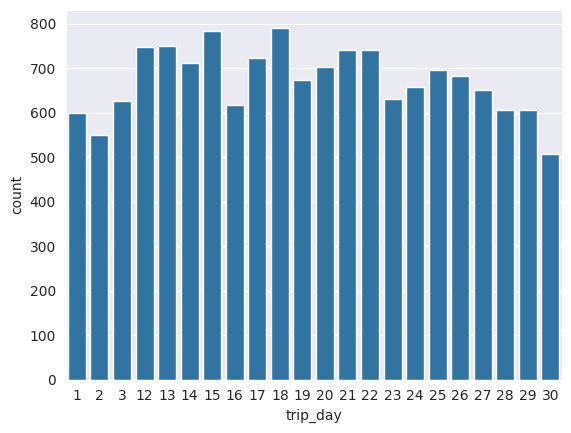

In [ ]:
sns.countplot(x='trip_day', data=trip_df)
plt.show()

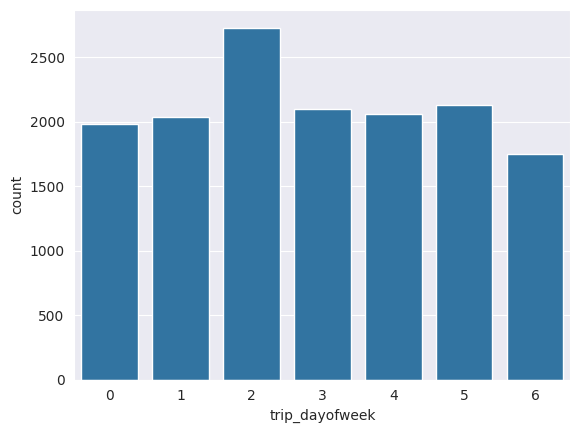

In [ ]:
sns.countplot(x='trip_dayofweek', data=trip_df)
plt.show()

# there are less trips on sunday - 6
# Wednesday has highest count of trips

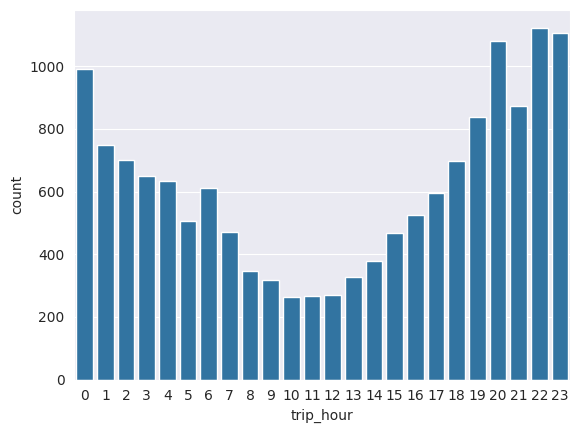

In [ ]:
sns.countplot(x='trip_hour', data=trip_df)
plt.show()  # trip hours unlike office hours, have greaater trip creations at night
# general idea is to avoid city traffic

In [ ]:
sns.countplot(x='trip_hour', data=trip_df[trip_df['route_type'] == 'Carting'])
sns.countplot(x='trip_hour', data=trip_df[trip_df['route_type'] == 'FTL'])
plt.show()

## Future work
1. Build forecasting models for trip creation based on dependent variables like state, city or time.


### Convert Notebook to PDF

In [43]:
# !pip install nbconvert

[NbConvertApp] WARNING | pattern 'Delhivery_feat_forecast.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
-

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace "/content/drive/MyDrive/Colab Notebooks/Scaler/Delhivery_feat_forecast.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Scaler/Delhivery_feat_forecast.ipynb to notebook
[NbConvertApp] Writing 130011 bytes to /content/drive/MyDrive/Colab Notebooks/Scaler/Delhivery_feat_forecast.ipynb


That didn't work, thought the converter ran, the file saved to github still had "state"/ widget metadata error

In [ ]:
import json

# Use the correct path
notebook_path = "/content/drive/MyDrive/Colab Notebooks/Scaler/Delhivery_feat_forecast.ipynb"

print(f"Processing notebook: {notebook_path}")

# Load the notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = json.load(f)

# Check if widgets exists in metadata
if 'widgets' in notebook.get('metadata', {}):
    print("Found widgets in metadata, removing...")
    del notebook['metadata']['widgets']
    print("Widgets section removed.")
else:
    print("No widgets section found in metadata.")

# Save the cleaned notebook
with open(notebook_path, 'w', encoding='utf-8') as f:
    json.dump(notebook, f, indent=1)

print("Notebook cleaned and saved.")